# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train.isna().mean()

id          0.000000
keyword     0.008257
location    0.330268
text        0.000000
target      0.000000
dtype: float64

In [6]:
train = train.fillna("")
train.isna().mean()

id          0.0
keyword     0.0
location    0.0
text        0.0
target      0.0
dtype: float64

In [7]:
test.isna().mean()

id          0.000000
keyword     0.007443
location    0.338441
text        0.000000
target      0.000000
dtype: float64

In [8]:
test = test.fillna("")
test.isna().mean()

id          0.0
keyword     0.0
location    0.0
text        0.0
target      0.0
dtype: float64

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [9]:
train.target.value_counts()

0    3024
1    2305
Name: target, dtype: int64

Видим, что положительного класса меньше примерно на 25%

2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

Так как самым популярным значением является пустая строка, выведем элементы со 2-ого по 11-ый.

In [10]:
popular_keywords = train.keyword.value_counts()[1:11]
popular_keywords

damage        36
siren         35
wreckage      34
fatalities    33
deluge        31
refugees      30
derail        30
fear          30
tsunami       30
fatality      30
Name: keyword, dtype: int64

In [58]:
freq_mask = train.keyword.isin(popular_keywords.index.to_list())
freq_mask.sort_index(key=)

1186    False
4071    False
5461    False
5787    False
7445    False
        ...  
5226    False
5390    False
860     False
7603    False
7270    False
Name: keyword, Length: 5329, dtype: bool

In [ ]:
freq_mask = train.keyword.isin(popular_keywords.index.to_list())
plt.figure(figsize=(16,8))
plt.title("Top 10 popular keywords")
sns.histplot(train[freq_mask], x="keyword", hue="target", palette="pastel", element="step", discrete=False)
plt.show()

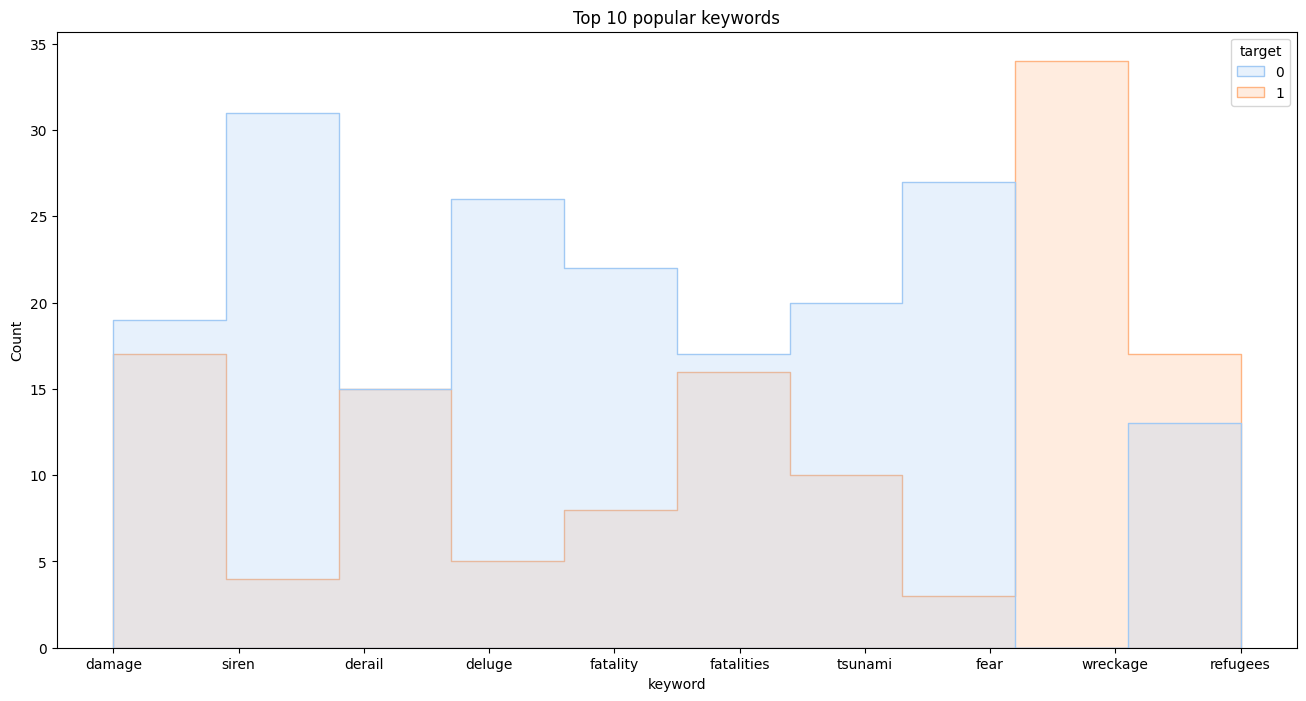

In [11]:
freq_mask = train.keyword.isin(popular_keywords.index.to_list())
plt.figure(figsize=(16,8))
plt.title("Top 10 popular keywords")
sns.histplot(train[freq_mask], x="keyword", hue="target", palette="pastel", element="step", discrete=False)
plt.show()

**Выводы**: Так, на графике можно видеть, что есть слова которые однозначно определяют положительный класс (wreckage - крушение); слово refugees (беженцы) также в большей части сопутствует положительному классу, что и не удивительно, так как беженцы чаще всего появляются после какой-либо катастрофы.

Есть слова, которые примерно одинаково влияют на target - damage (повреждение), derail (сойти с рельсов), fatalities (смертельные случаи).

Однако больше всего слов из 10 самых популярных относят наш твит к негативному классу (siren (сирена), deluge (потоп), fatality (смерть), tsunami (цунами), fear (опасения)).

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [12]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [14]:
train_new = train[['keyword','location', 'text', 'target']].copy()
train_new['text'] = train_new[['keyword','location', 'text']].agg(' '.join, axis=1)
train_new = train_new.drop(['keyword','location'], axis=1)

Обработаем таким же образом test, так как в будущем мы будем предсказывать на test.

In [15]:
test_new = test[['keyword','location', 'text', 'target']].copy()
test_new['text'] = test_new[['keyword','location', 'text']].agg(' '.join, axis=1)
test_new = test_new.drop(['keyword','location'], axis=1)

In [16]:
train_new.loc[[6590, 7122, 2769]]

,text,target
6590,"survivors Marietta, GA Stemming from my #Cubs ...",1
7122,violent%20storm If you were the NWS wth a rot...,1
2769,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...,0


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(train_new.text)

In [18]:
bow.shape

(5329, 18455)

Матрица (мешок слов) получилась достаточно большого размера: 5329 строк и 18455 колонок.

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [19]:
import re

In [20]:
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    return bool(re.search(r"\d", s))

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    return bool(re.search(r"[\W\_]", s))

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return bool(re.search(r"^#", s))

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    return bool(re.search(r"^@", s))

def investigate_vocabulary(vocabulary):
    count_digit = list(map(contains_digit, vocabulary.keys()))
    count_punctuation = list(map(contains_punctuation, vocabulary.keys()))
    count_hashtag = list(map(is_hashtag, vocabulary.keys()))
    count_mention = list(map(is_mention, vocabulary.keys()))
    
    print('With digit:      ', sum(count_digit)
          )
    print('With punctuation:', sum(count_punctuation)
          )
    print('Hashtags:        ', sum(count_hashtag)
          )
    print('Mentions:        ', sum(count_mention)
          )


In [21]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [22]:
investigate_vocabulary(vec.vocabulary_)

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


Получаем, что в нашем мешке слов есть большое количество слов с цифрами, в 10 раз меньше - с пунктуацией, а хештегов и упоминаний нет совсем.

## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [23]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
vec_tw = CountVectorizer(tokenizer=TweetTokenizer().tokenize)
vec_tw.fit_transform(train_new.text);

In [26]:
investigate_vocabulary(vec_tw.vocabulary_)

With digit:       3939
With punctuation: 7355
Hashtags:         1470
Mentions:         1679


**Сравнение:** получаем, что `TweetTokenizer` лучше токенизирует слова, чем `CountVectorizer`, так как у нас появляется значительное количество упоминаний и хештегов, которые `CountVectorizer` не находил; количество токенов пунктуации, которое стало в 2 раза больше количества цифр. Все это показывает существенные преимущества `TweetTokenizer`, так как он более точно классифицирует твиты.

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [27]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [28]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    return bool(re.search(r"^[a-zA-Z]+$", s))

def is_emoji(s: str) -> bool:
    # Проверка, является ли слово смайликом
    return bool(re.search(r"^[!\"#$%&\'*+,-./:;<=>?@[\]^_`{|}~]*[()]+[!\"#$%&\'*+,-./:;<=>?@[\]^_`{|}~]*$", s))

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return bool(re.search(r"^#+[a-zA-Z]+$", s))

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    s = s.lower()
    tw = TweetTokenizer()
    tokens = tw.tokenize(s)
    new_tokens = list(filter(contains_only_latin_letters, tokens)) + list(filter(is_hashtag, tokens)) + list(filter(is_emoji, tokens))
    new_tokens = list(set(new_tokens) - set(stopwords.words('english')))
    stemmer = SnowballStemmer("english")
    text_stemmed = [stemmer.stem(w) for w in new_tokens]
    return text_stemmed

In [29]:
custom_tokenizer('She LOVES painting :-) #art')

['paint', ':-)', 'love', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [30]:
pd.set_option('display.max_colwidth', None)
train_new.text.iloc[0:10].apply(custom_tokenizer).to_frame()

,text
1186,"[histori, worst, ash, among, bundl, collaps, australia, trent, england, bridg]"
4071,"[michigan, hail, #wrestleon, stream, thank, great, camp, carol, illinoi, #goblu, techniqu]"
5461,"[houston, tennesse, movi, theater, polic, suspect, cnn, kill, shoot]"
5787,"[coupl, class, left, hour, riot, still]"
7445,"[elbow, path, knee, beach, morn, lake, left, wipe, highland, wound, right, surfac, run, crack]"
151,"[somewher, island, reunion, found, begin, accid, expert, airplan, french, #mlb, examin, franc, debri, air]"
915,"[indian, kill, fun, boast, killer, perth, bloodi, isol, video, remorseless, world, smirk, pakistani, show, citi, came]"
1305,"[except, idk, burn, realli]"
2570,"[destroy, hous, ), (, ask]"
7399,"[wound, polic, venezuela, maracay, suspect, offic, dead, exchang, shot, nirgua]"


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [31]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
bow = vectorizer.fit_transform(train_new.text)
bow_test = vectorizer.transform(test_new.text)

2. Обучите LogisticRegression на полученных признаках.


In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(bow, train_new.target);

3. Посчитайте метрику f1-score на тестовых данных.

In [33]:
from sklearn.metrics import f1_score, classification_report

pred = clf.predict(bow_test)
print("F1 score:", f1_score(test_new.target, pred))

F1 score: 0.7466087900162779


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1
vec_1 = TfidfVectorizer(tokenizer=custom_tokenizer)
bow_1_train = vec_1.fit_transform(train_new.text)
bow_1_test = vec_1.transform(test_new.text)

clf_1 = LogisticRegression()
clf_1.fit(bow_1_train, train_new.target)
pred_1 = clf_1.predict(bow_1_test)

print("F1 score:", f1_score(test_new.target, pred_1))

F1 score: 0.7512747875354108


1. **Ответ:** f1 score увеличился лишь на 0.01. Так, `TF-IDF` дает значительный вес словам, которые часто встречаются в текстах. А так как у твитов есть такая специфика, что слова встерчаются довольно часто в обоих классах текстов, то из-за этого наш классификатор не смог дать больших улучшений, так как слова, относящие и не относящие твиты к положительному классу, могут иметь близкие веса.

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [35]:
# 2
vec_2 = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
bow_2_train = vec_2.fit_transform(train_new.text)
bow_2_test = vec_2.transform(test_new.text)

clf_2 = LogisticRegression()
clf_2.fit(bow_2_train, train_new.target)
pred_2 = clf_2.predict(bow_2_test)

print("F1 score:", f1_score(test_new.target, pred_2))

F1 score: 0.7512747875354108


In [37]:
print(f"Shape of matrix for Tfidf: {bow_1_train.shape}", f"Shape of matrix for Tfidf with max_df = 0.9: {bow_2_train.shape}", sep="\n") 

Shape of matrix for Tfidf: (5329, 10482)
Shape of matrix for Tfidf with max_df = 0.9: (5329, 10482)


2. **Ответ:** Качество метрики не изменилось, так как в данном векторайзере мы выкинули слова, которые встречаются в >90% твитов, НО, учитывая, что до этого мы предобработали данные - убрали стоп-слова, вряд ли такие слова будут, либо их будет очень мало. А раз размеры наших матриц не изменились, значит таких слов не нашлось, и, следовательно, результат остался прежним.

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [38]:
# 3
vec_3 = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=0.0005)
bow_3_train = vec_3.fit_transform(train_new.text)
bow_3_test = vec_3.transform(test_new.text)

clf_3 = LogisticRegression()
clf_3.fit(bow_3_train, train_new.target)
pred_3 = clf_3.predict(bow_3_test)

print("F1 score:", f1_score(test_new.target, pred_3))

F1 score: 0.7541899441340782


In [39]:
print(f"Shape of matrix for Tfidf: {bow_1_train.shape}", f"Shape of matrix for Tfidf with min_df = 0.0005: {bow_3_train.shape}", sep="\n") 

Shape of matrix for Tfidf: (5329, 10482)
Shape of matrix for Tfidf with min_df = 0.0005: (5329, 3135)


3. **Ответ:** В этот раз при установлении параметра `min_df=0.0005` наша метрика улучшилась на 0.003. Так как благодаря данному параметру векторайзер будет игнорировать слова, которые встречаются реже указанного порога, именно поэтому необходимо подбирать это значение очень маленьким, опять же из-за специфики твитов (маленькие тексты). Однако при этом видим, что размер нашей матрицы уменьшился в 3 раза.

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [40]:
from sklearn.feature_extraction.text import HashingVectorizer

vec_hash = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
bow_hash_train = vec_hash.fit_transform(train_new.text)
bow_hash_test = vec_hash.transform(test_new.text)

clf_hash = LogisticRegression()
clf_hash.fit(bow_hash_train, train_new.target)
pred_hash = clf_hash.predict(bow_hash_test)

print("F1 score:", f1_score(test_new.target, pred_hash))

F1 score: 0.7225368063420159


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** Самый высокий результат показал 3-ый способ - `TfidfVectorizer с параметром min_df=0.0005`. `HashingVectorizer` в данном случае показал самый низкий результат.

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

Так как самый лучший показатель у 3-ого способа, и его f1 score >0.75, то используем его.

In [41]:
vec_3 = TfidfVectorizer(tokenizer=custom_tokenizer, min_df=0.0005)
bow_3_train = vec_3.fit_transform(train_new.text)
bow_3_test = vec_3.transform(test_new.text)

clf_3 = LogisticRegression()
clf_3.fit(bow_3_train, train_new.target)
pred_3 = clf_3.predict(bow_3_test)

print("F1 score:", f1_score(test_new.target, pred_3))

F1 score: 0.7541899441340782
